# DESAFIO 3 ANALISIS ESTADISTICO CON PYTHON-DATA SCIENCE-DESAFIO LATAM

### Descripción
Un grupo de investigadores está interesado en analizar la relación entre el hábito de fumar
con el crecimiento de los bebés en edad gestacional. Para esto han recopilado los datos
guardados en el dataset baby.csv, que contiene los siguientes campos de datos:
- **Birth.Weight** : Peso del bebe
- **Gestational.Days**: Días de gestación
- **Maternal.Age**: Edad de la madre
- **Maternal.Height**: Altura de la madre
- **Maternal.Pregnancy.Weight**: Peso de la madre
- **Maternal.Smoker**: ¿Es la madre fumadora? (True: fumadora, False: no es fumadora)

## A partir de estos datos se solicita:

### 1. Realiza una exploración de los datos, considerando sus tipos y los descriptivos correspondientes.

In [21]:
# Importamos librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, percentileofscore


In [5]:
# Importamos los datos desde el archivo 'baby.csv' y lo almacenamos en df_baby
df_baby = pd.read_csv('baby.csv')
df_baby.head()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False


In [6]:
# Describimos los datos de forma general
df_baby.describe()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,587.500000,119.462521,279.101363,27.228279,64.049404,128.478705
std,339.048915,18.328671,16.010305,5.817839,2.526102,20.734282
min,1.000000,55.000000,148.000000,15.000000,53.000000,87.000000
25%,294.250000,108.000000,272.000000,23.000000,62.000000,114.250000
50%,587.500000,120.000000,280.000000,26.000000,64.000000,125.000000
75%,880.750000,131.000000,288.000000,31.000000,66.000000,139.000000
max,1174.000000,176.000000,353.000000,45.000000,72.000000,250.000000


In [7]:
df_baby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0                 1174 non-null   int64
 1   Birth.Weight               1174 non-null   int64
 2   Gestational.Days           1174 non-null   int64
 3   Maternal.Age               1174 non-null   int64
 4   Maternal.Height            1174 non-null   int64
 5   Maternal.Pregnancy.Weight  1174 non-null   int64
 6   Maternal.Smoker            1174 non-null   bool 
dtypes: bool(1), int64(6)
memory usage: 56.3 KB


In [8]:
df_baby.isnull().sum()

Unnamed: 0                   0
Birth.Weight                 0
Gestational.Days             0
Maternal.Age                 0
Maternal.Height              0
Maternal.Pregnancy.Weight    0
Maternal.Smoker              0
dtype: int64

### 2. Considera los pesos de los bebés. ¿Se puede decir que siguen una distribución
### normal? Justifica tu respuesta creando los gráficos y modelos necesarios.

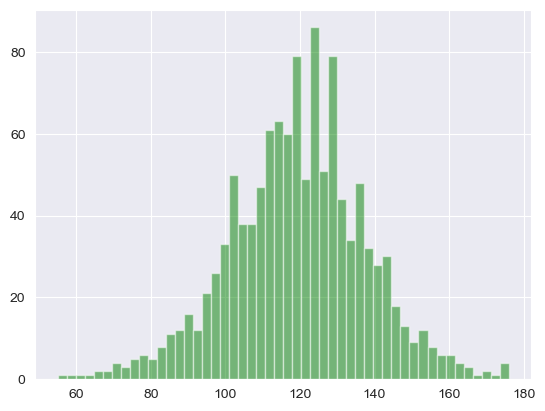

In [9]:
# Definimos una variable llamada pesos
pesos = df_baby['Birth.Weight']
mu= pesos.mean()
sigma=pesos.std()
minimo=pesos.min()
maximo=pesos.max()
x = np.linspace(minimo, maximo)
pdf = norm.pdf(x, loc=mu, scale=sigma)
counts, bins, _ = plt.hist(pesos, bins=50, alpha=0.5, color='g', density=False)
bin_width = bins[1] - bins[0]
pdf_scaled = pdf * len(pesos) * bin_width

/Users/cesarjara/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


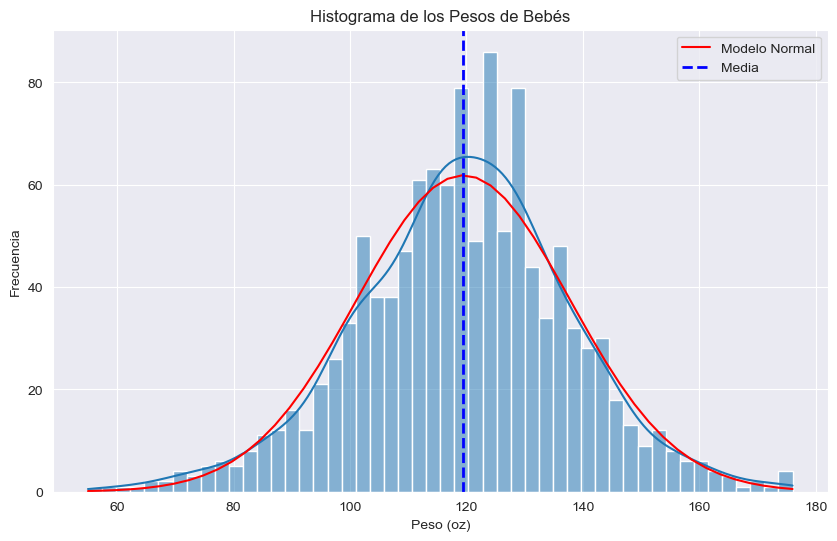

In [13]:
# 1. Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_baby, x=pesos, kde=True, bins=50)
plt.plot(x, pdf_scaled, 'r', label='Modelo Normal')
plt.axvline(x=mu, color='blue', linestyle='--', linewidth=2, label='Media')
plt.title('Histograma de los Pesos de Bebés')
plt.xlabel('Peso (oz)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [18]:
# Realiza el test de Shapiro-Wilk
shapiro_test = stats.shapiro(pesos)

# Muestra los resultados
print(f"Estadístico de Shapiro-Wilk: {shapiro_test.statistic}")
print(f"P-valor: {shapiro_test.pvalue}")

Estadístico de Shapiro-Wilk: 0.9956278800964355
P-valor: 0.001911137835122645


In [19]:
# Pruebas de Normalidad
shapiro_test = stats.shapiro(pesos)
ks_test = stats.kstest(pesos, 'norm', args=(np.mean(pesos), np.std(pesos)))
anderson_test = stats.anderson(pesos, dist='norm')

shapiro_test, ks_test, anderson_test

(ShapiroResult(statistic=0.9956278800964355, pvalue=0.001911137835122645),
 KstestResult(statistic=0.03866843839429762, pvalue=0.05819181424551556, statistic_location=114, statistic_sign=-1),
 AndersonResult(statistic=1.4094503063213324, critical_values=array([0.574, 0.654, 0.784, 0.915, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=119.46252129471891, scale=18.32867144332098)
  success: True
  message: '`anderson` successfully fit the distribution to the data.'))

### 3. Considerando lo anterior, verifica el modelo de distribución normal de los pesos para 5
### valores diferentes. Compara con los datos reales.

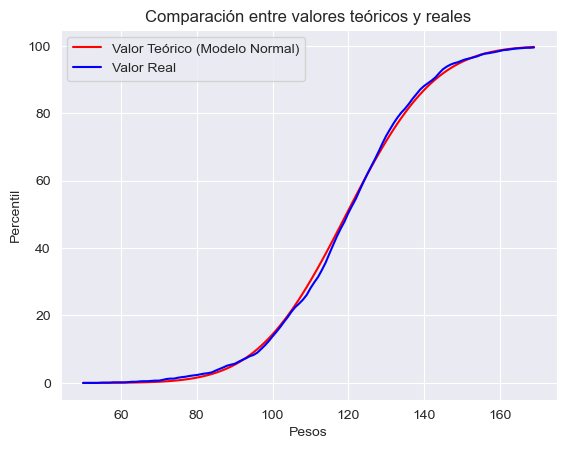

In [32]:
test_pesos = list(range(50, 170))

# Listas para almacenar los valores de peso, p_modelo, y p_real
pesos_teoricos = []
pesos_reales = []
p_modelo_list = []
p_real_list = []

for peso in test_pesos:
    p_modelo = norm.cdf(peso, loc=mu, scale=sigma) * 100
    p_real = percentileofscore(pesos, peso)
    pesos_teoricos.append(peso)
    pesos_reales.append(peso)
    p_modelo_list.append(p_modelo)
    p_real_list.append(p_real)

# Graficar las líneas teórica y real
plt.plot(pesos_teoricos, p_modelo_list, 'r-', label='Valor Teórico (Modelo Normal)')
plt.plot(pesos_reales, p_real_list, 'b-', label='Valor Real')
plt.xlabel('Pesos')
plt.ylabel('Percentil')
plt.title('Comparación entre valores teóricos y reales')
plt.legend()
plt.grid(True)
plt.show()

### 4. Compara los pesos de los bebés de madres fumadoras y no fumadoras. ¿Qué
### diferencias existen? Explica y construye los modelos correspondientes.

In [24]:
df_baby['Maternal.Smoker'].value_counts(normalize=True)

Maternal.Smoker
False    0.609029
True     0.390971
Name: proportion, dtype: float64

/Users/cesarjara/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


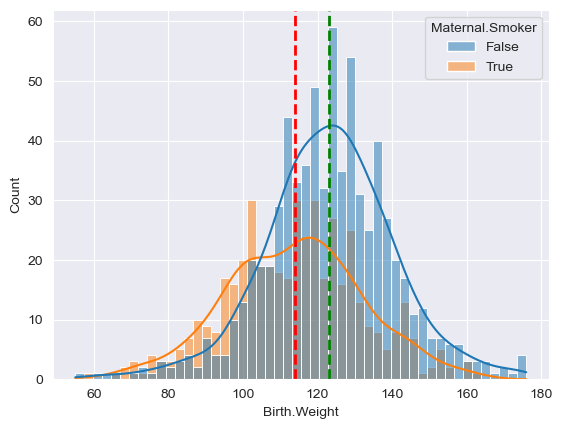

In [29]:
mean_non_smoker = df_baby[df_baby['Maternal.Smoker'] == False]['Birth.Weight'].mean()
mean_smoker = df_baby[df_baby['Maternal.Smoker'] == True]['Birth.Weight'].mean()
sns.histplot(data=df_baby, x="Birth.Weight", bins=50, hue='Maternal.Smoker', kde=True)
plt.axvline(mean_smoker, color='red', linestyle='dashed', linewidth=2)
plt.axvline(mean_non_smoker, color='green', linestyle='dashed', linewidth=2)
plt.show()

### 5. Considerando los datos dados:
- Calcula la probabilidad de que una madre escogida al azar fume.
- A partir del valor anterior, construye un modelo de distribución binomial que
modele el experimento correspondiente a escoger 5 madres al azar y observar
cuántas fuman.
- Utilizando este modelo, simula 1000 muestras de tamaño 8, y calcula sus medias
muestrales.
- Utilizando los datos directamente, extrae 1000 muestras de tamaño 8 y calcula
sus respectivas medias muestrales.

Utilizando lo anterior:
- Compara gráficamente los resultados obtenidos anteriormente.
- Verifica el teorema del límite central, considerando las muestras de datos reales y
las simuladas con el modelo binomial.
- Construye un modelo de distribución normal derivado del modelo binomial, y
grafícalo junto a los anteriores para comparar. Concluye.

In [55]:
# Calculamos la probabilidad de que una madre seleccionada al azar fume.
madres_fuman = (df_baby['Maternal.Smoker'] == True).sum()
madres_total = df_baby['Maternal.Smoker'].count()
p_madre_fuma = madres_fuman / madres_total * 100
print(f'La probabilidad de que una Madre fume es de {p_madre_fuma.round(2)}%')


La probabilidad de que una Madre fume es de 39.1%


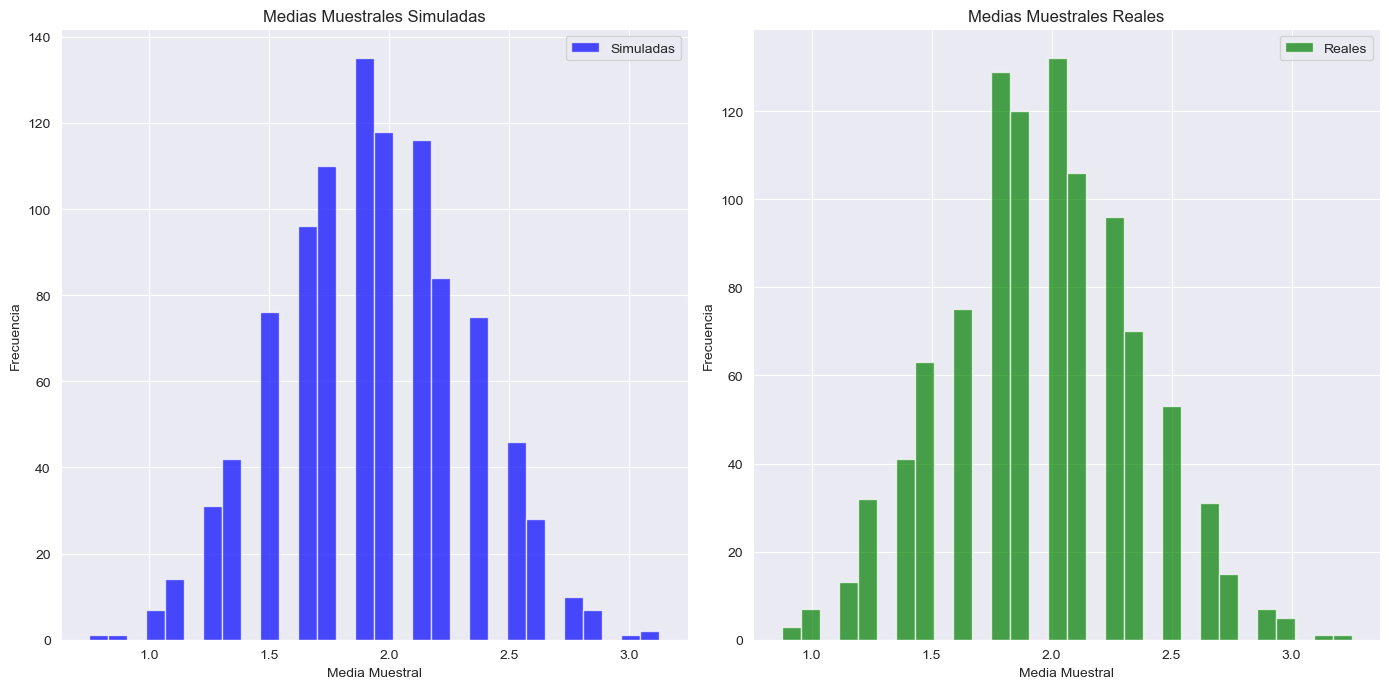

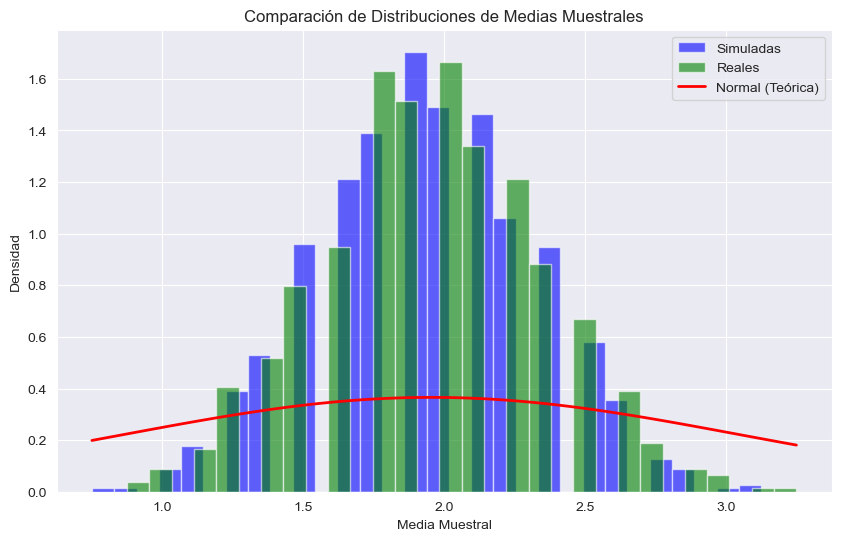

In [59]:
# Parámetros de la distribución binomial
n = 5  # Número de madres seleccionadas al azar
p = (p_madre_fuma / 100)  # Probabilidad de que una madre fume

# Paso 2: Simulación de muestras de la distribución binomial
np.random.seed(42)  # Para reproducibilidad
binomial_samples = np.random.binomial(n=n, p=p, size=(1000, 8))

# Calculamos las medias muestrales de las 1000 muestras
sample_means_simulated = np.mean(binomial_samples, axis=1)

# Paso 3: Generación de datos reales y extracción de muestras
real_data = np.random.binomial(n=n, p=p, size=10000)  # Generamos un conjunto grande de datos reales
real_samples = np.random.choice(real_data, size=(1000, 8), replace=True)  # Extraemos 1000 muestras
sample_means_real = np.mean(real_samples, axis=1)

# Paso 4: Comparación gráfica
plt.figure(figsize=(14, 7))

# Histograma de las medias muestrales simuladas
plt.subplot(1, 2, 1)
plt.hist(sample_means_simulated, bins=30, color='blue', alpha=0.7, label='Simuladas')
plt.title('Medias Muestrales Simuladas')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma de las medias muestrales de datos reales
plt.subplot(1, 2, 2)
plt.hist(sample_means_real, bins=30, color='green', alpha=0.7, label='Reales')
plt.title('Medias Muestrales Reales')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

# Paso 5: Modelo de distribución normal derivado del modelo binomial
mean_binomial = n * p  # Media de la distribución binomial
var_binomial = n * p * (1 - p)  # Varianza de la distribución binomial
std_binomial = np.sqrt(var_binomial)  # Desviación estándar de la distribución binomial

# Distribución normal derivada
x = np.linspace(min(sample_means_simulated.min(), sample_means_real.min()), 
                max(sample_means_simulated.max(), sample_means_real.max()), 100)
normal_dist = stats.norm.pdf(x, mean_binomial, std_binomial)

# Graficamos las distribuciones de las medias muestrales y la distribución normal
plt.figure(figsize=(10, 6))
plt.hist(sample_means_simulated, bins=30, density=True, alpha=0.6, color='blue', label='Simuladas')
plt.hist(sample_means_real, bins=30, density=True, alpha=0.6, color='green', label='Reales')
plt.plot(x, normal_dist, 'r-', lw=2, label='Normal (Teórica)')
plt.title('Comparación de Distribuciones de Medias Muestrales')
plt.xlabel('Media Muestral')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Conclusión:
- Las gráficas y la distribución normal ajustada demuestran el Teorema del Límite Central. Aunque los datos originales siguen una distribución binomial, las medias muestrales se distribuyen de manera aproximadamente normal cuando se toman muestras suficientemente grandes, tanto en los datos simulados como en los generados directamente.
- Esta propiedad es fundamental en la inferencia estadística, ya que permite usar métodos basados en la normalidad para inferir sobre medias poblacionales incluso cuando los datos subyacentes no son normales.

In [51]:
sample_means_simulated.mean()

1.9315

In [60]:
p

0.3909710391822829